In [1]:
using LinearAlgebra
using Random
using Distributions
using StatsPlots

In [2]:
A = [
    2 -1
    -1 2
]

2×2 Matrix{Int64}:
  2  -1
 -1   2

In [3]:
dist = MvNormal(A)

ZeroMeanFullNormal(
dim: 2
μ: Zeros(2)
Σ: [2.0 -1.0; -1.0 2.0]
)


In [4]:
A[1,2]/√(A[1,1]*A[2,2])

-0.5

cor(X, Y) = -0.5034517531708952


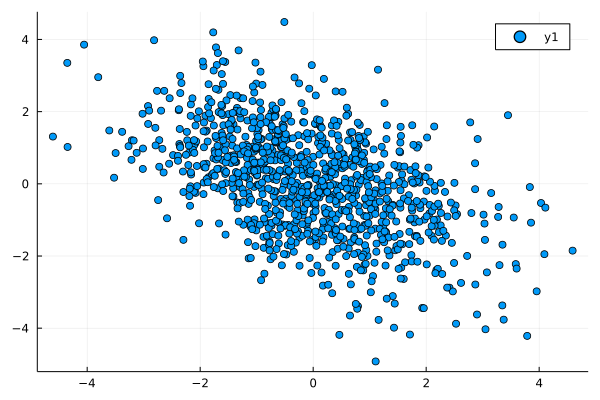

In [5]:
n = 2^10
XY = rand(dist, n)
X, Y = XY[1,:], XY[2,:]
@show cor(X, Y)

scatter(X, Y)

In [6]:
function sim(A, n, L=10^5)
    dist = MvNormal(A)
    R = zeros(L)
    XY = zeros(2, n)
    for i in eachindex(R)
        rand!(dist, XY)
        R[i] = @views cor(XY[1,:], XY[2,:])
    end
    R
end

sim (generic function with 2 methods)

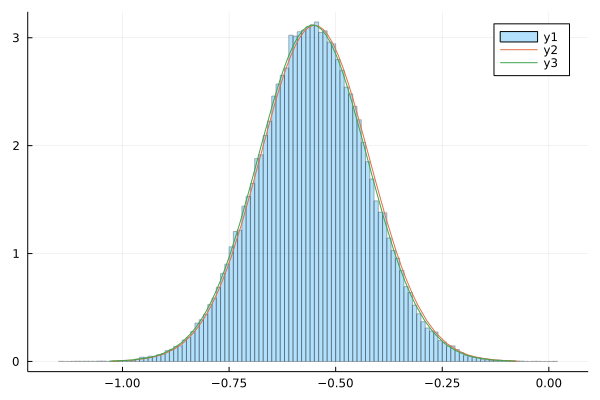

In [7]:
n = 2^6
R = sim(A, n)
Z = atanh.(R)
r0 = A[1,2]/√(A[1,1]*A[2,2])
z0 = atanh(r0)
histogram(Z; norm=true, alpha=0.3, bin=200)
plot!(Normal(z0, 1/√(n - 3)))
plot!(fit_mle(Normal, Z))

cor(X, Y) = 0.6622117576829664


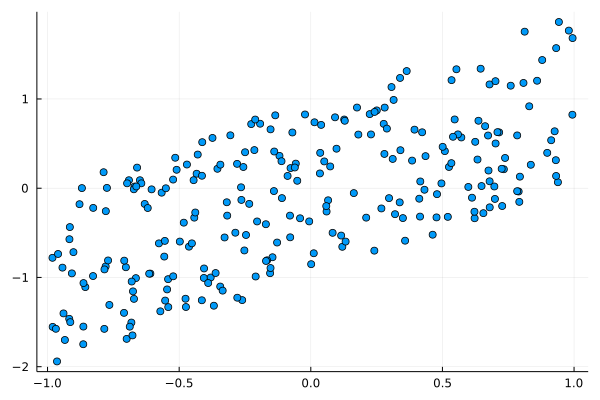

In [8]:
n = 2^8
x, y = rand(Uniform(-1, 1), n), rand(Uniform(-1, 1), n)
X, Y = x, x + y
@show cor(X, Y)
scatter(X, Y; label="")

In [9]:
function sim2(n, L=10^5)
    R = zeros(L)
    d = Uniform(-1, 1)
    x = zeros(n)
    y = similar(x)
    Y = similar(x)
    for i in eachindex(R)
        rand!(d, x)
        rand!(d, y)
        @. Y = x + y
        R[i] = cor(x, Y)
    end
    R
end

sim2 (generic function with 2 methods)

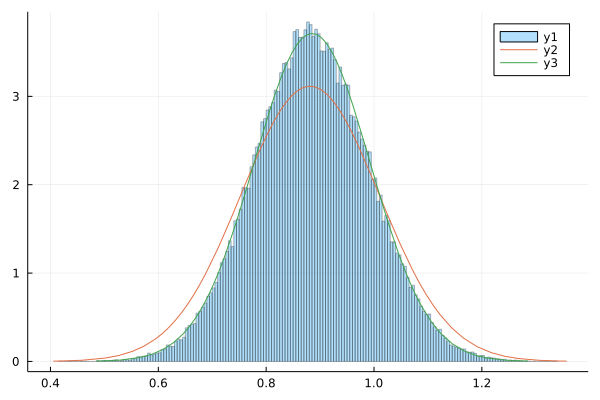

In [10]:
n = 2^6
R = sim2(n)
Z = atanh.(R)
r0 = 1/√2
z0 = atanh(r0)
histogram(Z; norm=true, alpha=0.3, bin=200)
plot!(Normal(z0, 1/√(n - 3)))
plot!(fit_mle(Normal, Z))

cor(X, Y) = 0.7541622109030921


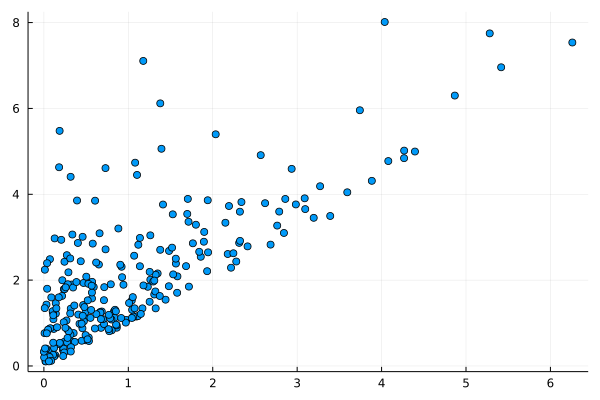

In [11]:
n = 2^8
x, y = rand(Exponential(), n), rand(Exponential(), n)
X, Y = x, x + y
@show cor(X, Y)
scatter(X, Y; label="")

In [12]:
function sim3(n, L=10^5)
    R = zeros(L)
    d = Exponential()
    x = zeros(n)
    y = similar(x)
    Y = similar(x)
    for i in eachindex(R)
        rand!(d, x)
        rand!(d, y)
        @. Y = x + y
        R[i] = cor(x, Y)
    end
    R
end

sim3 (generic function with 2 methods)

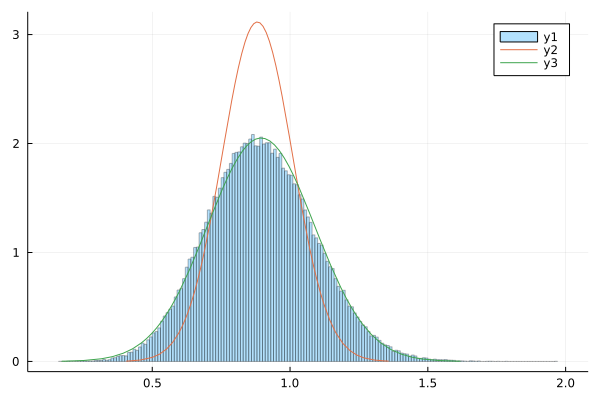

In [13]:
n = 2^6
R = sim3(n)
Z = atanh.(R)
r0 = 1/√2
z0 = atanh(r0)
histogram(Z; norm=true, alpha=0.3, bin=200)
plot!(Normal(z0, 1/√(n - 3)))
plot!(fit_mle(Normal, Z))

In [14]:
function simplot(dist, n, L=10^5)
    Z = zeros(L)
    x = zeros(n)
    y = similar(x)
    Y = similar(x)
    for i in eachindex(R)
        rand!(dist, x)
        rand!(dist, y)
        @. Y = x + y
        Z[i] = atanh(cor(x, Y))
    end
    r0 = 1/√2
    z0 = atanh(r0)
    histogram(Z; norm=true, alpha=0.3, bin=200)
    plot!(Normal(z0, 1/√(n - 3)))
    plot!(fit_mle(Normal, Z))
end

simplot (generic function with 2 methods)

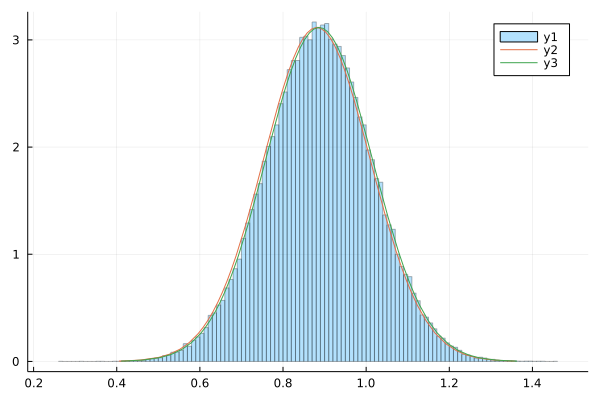

In [15]:
simplot(Normal(), 2^6)

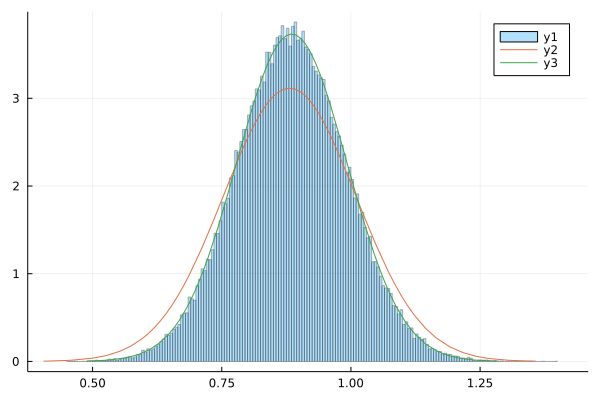

In [16]:
simplot(Uniform(), 2^6)

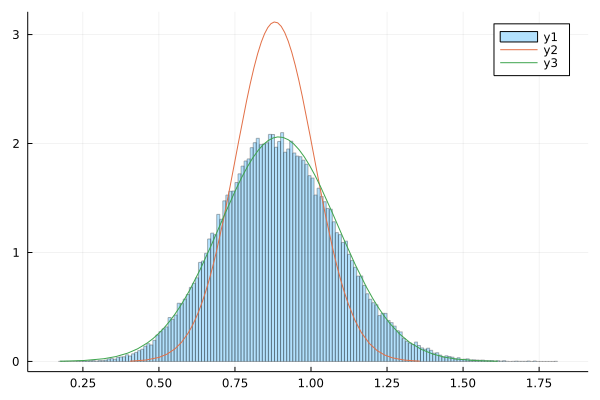

In [17]:
simplot(Exponential(), 2^6)

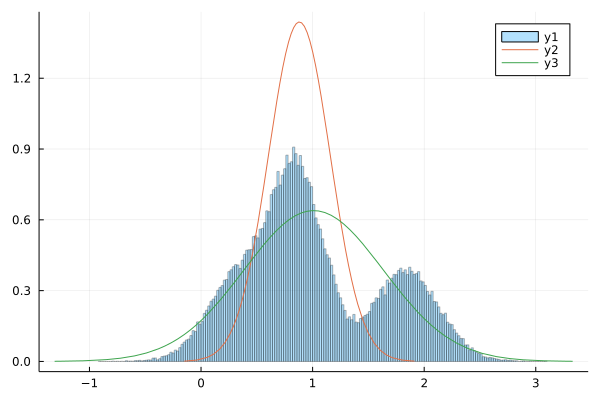

In [18]:
simplot(MixtureModel([Normal(), Normal(10, 1)], [0.95, 0.05]), 2^4)

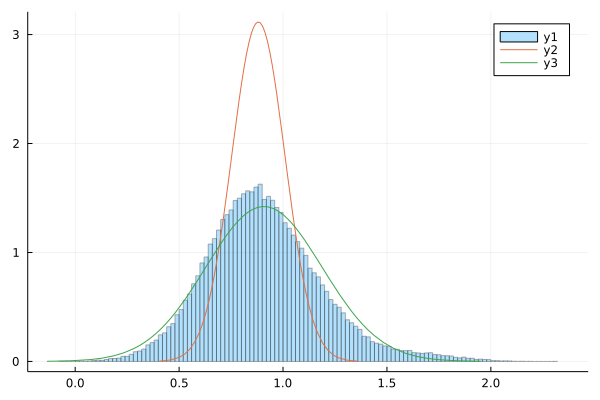

In [19]:
simplot(MixtureModel([Normal(), Normal(10, 1)], [0.95, 0.05]), 2^6)